In [ ]:
## install sci-kit learn
!pip install scikit-learn

In [ ]:
## load the K-nn algorithm for nearest neighbors 
from sklearn.neighbors import NearestNeighbors

In [ ]:
## load a dataset 
from sklearn.datasets import load_iris
X, y  = load_iris(return_X_y=True)

In [ ]:
## number of neighbors to use
k = 5

## instantiate the object 
knn = NearestNeighbors(n_neighbors=k)

## fit the object to the data
knn.fit(X)

# ## find the k nearest neighbors of the first example
print(knn.kneighbors(X[0:1]))

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
## plot the data

plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
!pip install -qq pandas
## load the data 
import pandas as pd 

In [ ]:
df = pd.read_csv("./data/data.csv")
## skip the first row 
## make the 2nd row the column names 
first_row = df.iloc[0]
df.columns = first_row
df = df.iloc[1:]
## drop the Cost/Energy…? column
to_drop = df.columns[-1]
df.drop(to_drop, axis=1, inplace=True)
## set "Processes" to the index 
df = df.set_index("Processes")
## convert to float 
df = df.astype(int)

In [ ]:
## there are processes P-001 to P-030 and there are materials M-001 to M-020
## for each process, create a list of tuples, such as: (P-001, M-001, value), (P-001, M-002, value), ...
## this will be a list of edges 
l = []
for process in df.index:
    for material in df.columns:
         l.append((process, material))#, df.loc[process, material]))

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx

In [ ]:
## making the bipartite graph 
from networkx.algorithms import bipartite

## get the processses 
processes = list(df.index)
## get the materials 
materials = list(df.columns)

## get the edge lists 
## make an edgelist dictionary 
edge_list = []
for process in df.index:
    for material in df.columns:
        #d = dict(A=process, B=material, energy=df.loc[process, material])
        edge_list.append((process, material))#, df.loc[process, material]))

In [ ]:
## making the bipartite graph 
from networkx.algorithms import bipartite


###
### MAKING THE EDGE LIST
###

## get the processses 
processes = list(df.index)
## get the materials 
materials = list(df.columns)

## get the edge lists 
## make an edgelist dictionary 
edge_list = []
for process in df.index:
    for material in df.columns:
        #d = dict(A=process, B=material, energy=df.loc[process, material])
        if df.loc[process, material] != 0:
            edge_list.append((process, material))
        #edge_list.append((process, material))#, df.loc[process, material]))



###
### MAKING THE BIGRAPH
###

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(processes, bipartite=0) ## our nodes are the processes

B.add_nodes_from(materials, bipartite=1) ## our nodes are the materials

# Add edges only between nodes of opposite node sets
B.add_edges_from(edge_list)


## get the bipapartite parts 
# u = [n for n in B.nodes if B.nodes[n]['bipartite'] == 0]
# v = [n for n in B.nodes if B.nodes[n]['bipartite'] == 1]

###
### MAKING THE BIGRAPH POSITION
###
# Separate by group
left_set, right_set = bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(left_set))
pos.update((node, (2, index)) for index, node in enumerate(right_set))


## for each connection, add the corresponding value from the dataframe
for edge in B.edges():
    B[edge[0]][edge[1]]['weight'] = df.loc[edge[0], edge[1]]

nx.draw(B, pos=pos)
plt.show()


In [ ]:
all_edges = B.edges(data=True)
valid_eges = []
for i in all_edges:
    if i[2]['weight'] != 0:
        valid_eges.append(i)

In [ ]:
valid_edges = [(x[0],x[1]) for x in valid_eges]

In [ ]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(processes, bipartite=0) ## our nodes are the processes

B.add_nodes_from(materials, bipartite=1) ## our nodes are the materials

# Add edges only between nodes of opposite node sets
B.add_edges_from(valid_edges)


## get the bipapartite parts 
# u = [n for n in B.nodes if B.nodes[n]['bipartite'] == 0]
# v = [n for n in B.nodes if B.nodes[n]['bipartite'] == 1]

###
### MAKING THE BIGRAPH POSITION
###
# Separate by group
left_set, right_set = bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(left_set))
pos.update((node, (2, index)) for index, node in enumerate(right_set))


## for each connection, add the corresponding value from the dataframe
for edge in B.edges():
    B[edge[0]][edge[1]]['weight'] = df.loc[edge[0], edge[1]]

nx.draw(B, pos=pos)
plt.show()

In [ ]:
!pip install nxviz

/Users/Eric/.local/share/virtualenvs/CircularEconomy-7zFOP8Dc/lib/python3.9/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


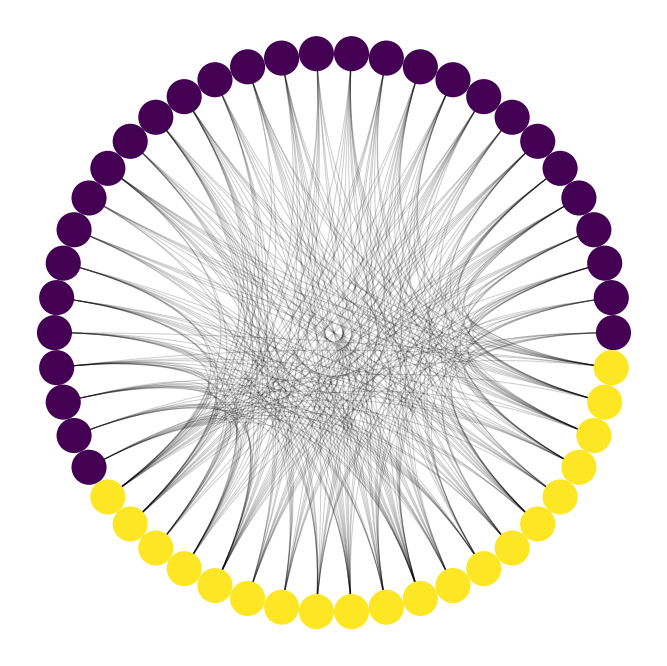

In [83]:
from nxviz import CircosPlot
from pylab import rcParams
## set the figure size 
rcParams['figure.figsize'] = (12, 12)


c = CircosPlot(B, node_grouping='bipartite',node_color='bipartite')

In [ ]:
from nxviz import ArcPlot

a = ArcPlot(B)

/Users/Eric/.local/share/virtualenvs/CircularEconomy-7zFOP8Dc/lib/python3.9/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


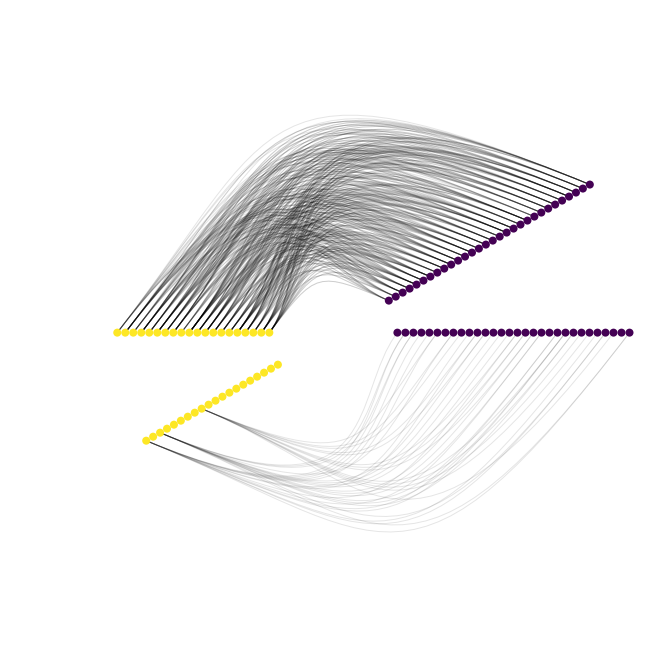

In [82]:
import nxviz
from nxviz import HivePlot

c = HivePlot(B, node_grouping='bipartite',node_color='bipartite')
#c.annotate.text(B, group_by="group", offset=3.14159 / 12)
#c.annotate.hive_group(B, group_by="group", offset=3.14159 / 12)


In [72]:
# !pip install pyvis

done
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23674 sha256=fd4b0be64767d8d87113b6b4df433f8edcaaf03e250d6d552b17ec473febc3ab
  Stored in directory: /Users/Eric/Library/Caches/pip/wheels/05/fb/37/c8dfe38ad21c8cc91f40a0f9e0196cfdd4534e817d0416a0ae
Successfully built pyvis


In [78]:
# from pyvis import network as net 
# g = net.Network(notebook=True)
# g.from_nx(B)


In [76]:
# from pyvis.network import Network
# nt = Network('500px', '500px')
# # populates the nodes and edges data structures
# nt.from_nx(B)
# nt.show(name='bipartite.html')

TypeError: Object of type int64 is not JSON serializable